## FELZENSZWAB SEGMENTATION ON 39 EXAMPLE IMAGES

In [71]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import felzenszwalb, chan_vese
from skimage.transform import resize
from skimage.color import rgb2gray

In [8]:
# Setup

def prep_im(im_id):
    '''Read image and corresponding ground truth segmentation from test images

    Args:
        im_id (str): image ID

    Returns:
        im (numpy.ndarray): image
        gt (numpy.ndarray): ground truth segmentation
    '''

    #Read and resize image
    im = plt.imread("fzw_test_ims/" + im_id + ".png")
    im = resize(im, (im.shape[0] // 4, im.shape[1] // 4), anti_aliasing=True)

    #Read and resize ground truth segmentation
    gt = plt.imread("sander_gt_segmentation/" + im_id + "_GT.png")
    gt = resize(gt, (gt.shape[0] // 4, gt.shape[1] // 4), anti_aliasing=True)

    return im, gt

In [46]:
im_ids = ["PAT_1693_3103_879", "PAT_875_1668_588", "PAT_1790_3425_942",
"PAT_106_159_325", "PAT_435_854_68", "PAT_1902_3790_168", "PAT_42_58_13", "PAT_302_651_529", 
"PAT_359_4450_86", "PAT_107_160_609", "PAT_134_201_587", "PAT_1453_1567_250",
"PAT_79_120_532", "PAT_1926_3871_371", "PAT_724_1369_896", "PAT_1582_2574_34",
"PAT_1006_53_716", "PAT_1431_1495_511", "PAT_944_1795_371", "PAT_793_1512_327", 
"PAT_394_1562_579", "PAT_1842_3615_850", "PAT_621_1183_56", "PAT_374_762_794", 
"PAT_265_406_276", "PAT_1074_322_662", "PAT_289_1399_481", "PAT_1803_3463_639", 
"PAT_1029_135_239", "PAT_2020_4174_799", "PAT_682_1292_986", "PAT_805_1517_154", 
"PAT_680_1289_182", "PAT_53_1370_245", "PAT_868_1657_698", "PAT_183_283_495", 
"PAT_479_919_97", "PAT_333_1469_499", "PAT_867_1650_901"]

In [47]:
images = {}
groundtruths = {}
for im_id in im_ids:
    im, gt = prep_im(im_id)
    images[im_id] = im[:, :, :3] #Some images have fourth, empty color chanel which we slice of here
    groundtruths[im_id] = gt

In [61]:
def fzw(image, scale, sigma):
    '''Performs the Felzenszwalb segmentation algorithm on an image

    Args:
        image (numpy.ndarray): image to segment
        scale (float): controls the observation lever, higher values gives fewer but larger segments 
        sigma (float): the diameter of a Gaussian smoothing kernel, higher values equals higher degree of smoothing
    
        Returns:
            segments (numpy.ndarray): segmentated image.
    '''
    
    segments = felzenszwalb(image, 
                           scale=scale, 
                           sigma=sigma,
                           min_size=image.size // 500,
                           channel_axis=2
                           )
    return segments

scale = 500
sigma = .75

fzw_segmentations = {}
for im_id in im_ids:
    im = images[im_id]
    fzw_segmentations[im_id] = fzw(im, scale, sigma)

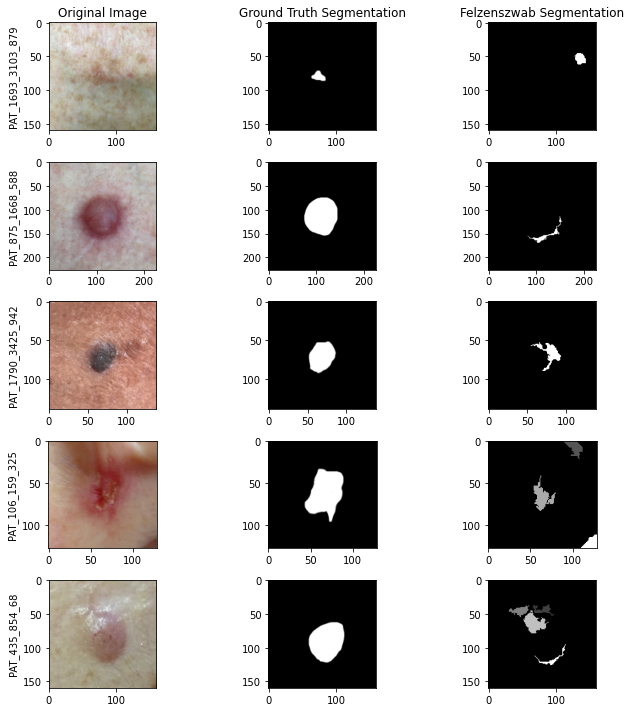

In [62]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
axes[0, 0].set_title("Original Image")
axes[0, 1].set_title("Ground Truth Segmentation")
axes[0, 2].set_title("Felzenszwab Segmentation")

for i in range(5):
    im = im_ids[i]
    axes[i, 0].set_ylabel(im)
    axes[i, 0].imshow(images[im])
    axes[i, 1].imshow(groundtruths[im], cmap="gray")
    axes[i, 2].imshow(fzw_segmentations[im], cmap="gray")

fig.tight_layout()


### Does not work well